In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
from google.colab.patches import cv2_imshow
from google.colab import drive

drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Colab Notebooks/Mestrado/VISAO_ROBOTICA/Operacoes_basicas_imagens')

PATH = os.getcwd()
print(PATH)
print(os.listdir())
print(cv.__version__)

def cm_to_inch(value):
    return value/2.54

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Mestrado/VISAO_ROBOTICA
['Operacoes_basicas_imagens', 'Formacao_de_imagens']
4.10.0


L x A : 612x417


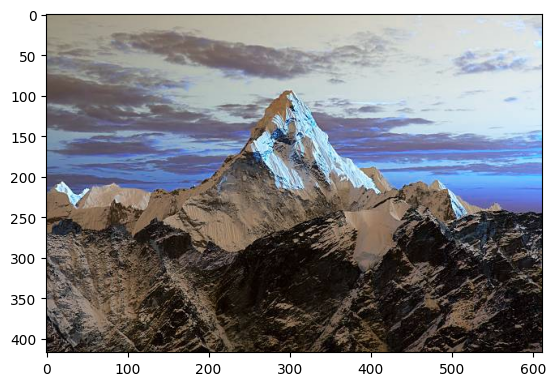

In [ ]:
img = cv.imread("everest.jpg")

if img is None:
    print("Erro ao ler a imagem")

else:
    print(f'L x A : {img.shape[1]}x{img.shape[0]}')

    plt.imshow(img)
    plt.show()

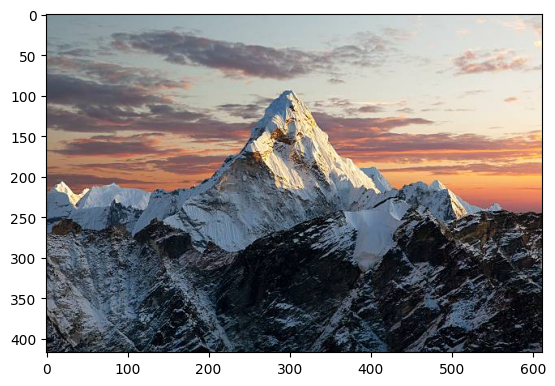

In [ ]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
print(f'cor do pixel (0,0): B {img[0,0,0]}\tG {img[0,0,1]}\tR {img[0,0,2]}')
print(f'Vetor BGR em (0,0): {img[0,0]}')

cor do pixel (0,0): B 153	G 147	R 128
Vetor BGR em (0,0): [153 147 128]


In [ ]:
cv.imwrite("cameraman_copia_opencv.png", img)
plt.imsave("cameraman_copia_matplotlib.png", img)

os.listdir()

['cameraman.png',
 'everest.jpg',
 'cameraman_copia_opencv.png',
 'cameraman_copia_matplotlib.png',
 'galaxias',
 'Operacoes_basicas_imgs.ipynb']

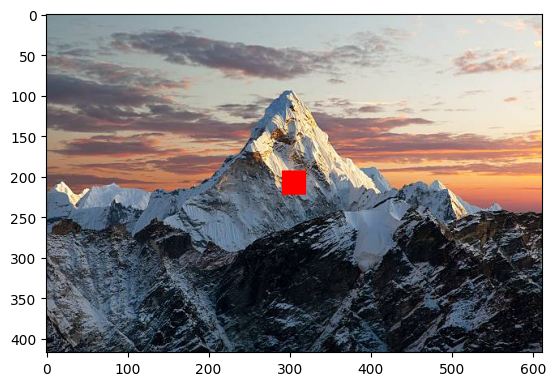

In [ ]:
img_copy = img.copy()

linha = int(img.shape[0] / 2)
coluna = int(img.shape[1] / 2)

img_copy[(linha-15):(linha+15), (coluna-15):(coluna+15)] = [0,0,255]

plt.imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))
plt.show()

del img_copy

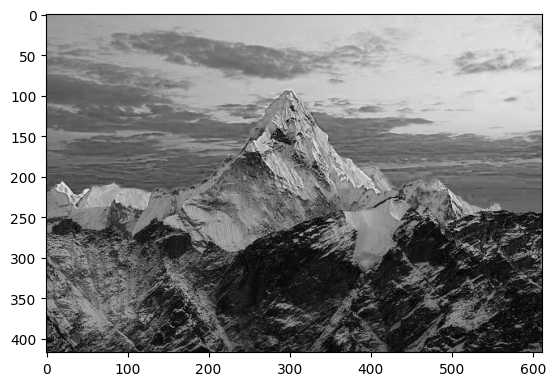

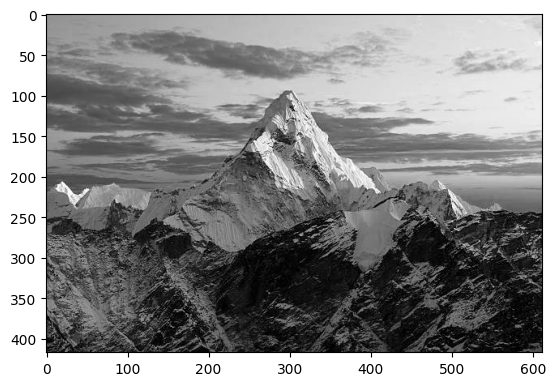

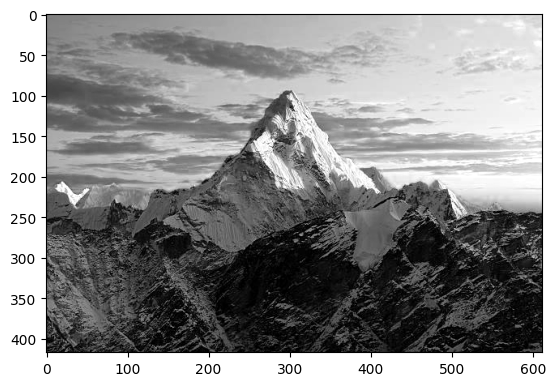

In [ ]:
for i in range(3):
    plt.imshow(img[:,:,i], cmap='gray')
    plt.show()

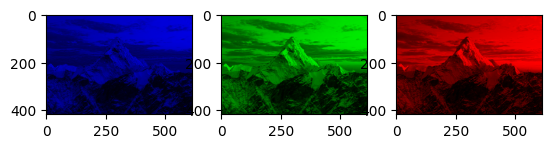

In [ ]:
canalB = img.copy()
canalB[:,:,1:3] = 0
canalG = img.copy()
canalG[:,:,0] = 0
canalG[:,:,2] = 0
canalR = img.copy()
canalR[:,:,0:2] = 0

plt.subplot(131)
plt.imshow(cv.cvtColor(canalB, cv.COLOR_BGR2RGB))
# plt.show()
plt.subplot(132)
plt.imshow(cv.cvtColor(canalG, cv.COLOR_BGR2RGB))
# plt.show()
plt.subplot(133)
plt.imshow(cv.cvtColor(canalR, cv.COLOR_BGR2RGB))
plt.show()

del canalB, canalG, canalR

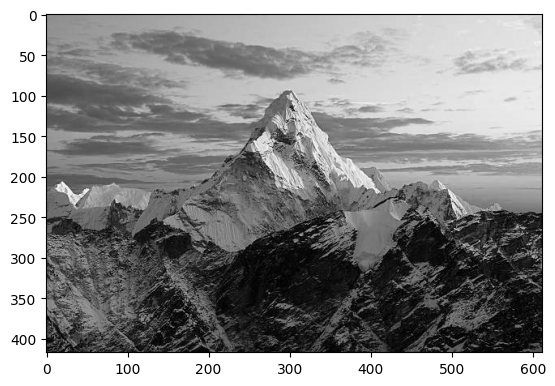

In [ ]:
img_gray = np.zeros((img.shape[0],img.shape[1]), dtype=np.uint8)

temp_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Maneira errada para transformar a imagem
# em tom de cinza
img_gray = temp_img[:,:,0]/3 + temp_img[:,:,1]/3 + temp_img[:,:,2]/3

# Primeiro soma os valores de bits de cada canal para depois
# realizar a divisão por 3, ssim o valor não trunca por causa
# da limitacao de 8 bits
img_gray = np.uint8((np.float16(img[:,:,0]) + np.float16(img[:,:,1]) + np.float16(img[:,:,2])) / 3)

plt.imshow(img_gray, cmap='gray')
plt.show()

del temp_img, img_gray

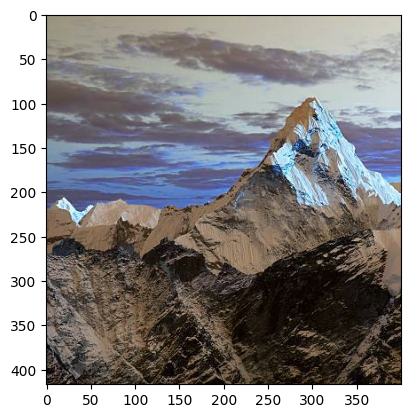

In [ ]:
img_crop = img[0:500, 0:400].copy()

plt.imshow(img_crop)
plt.show()

del img_crop

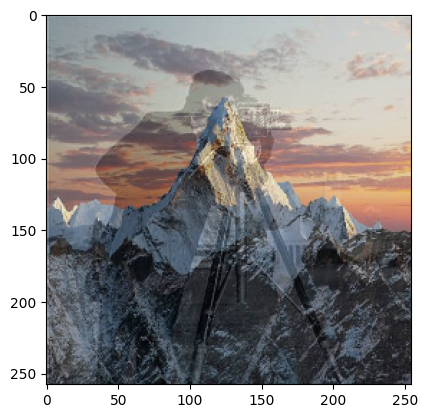

In [ ]:
img_cameraman = cv.imread("cameraman.png")


img_everest = img.copy()
img_everest = cv.cvtColor(img_everest, cv.COLOR_BGR2RGB)

# Burlando, sera feito uma funcao do zero
# (reinventando a roda) para fazer o resize
img_everest = cv.resize(img_everest, (img_cameraman.shape[1], img_cameraman.shape[0]))

# Para fazer a operacao de colocar as duas imagens em uma
# ambas as imagens devem ser do mesmo tamnho
alpha = 0.750
# img_duas_imgs = np.uint8(alpha*img_everest[0:img_cameraman.shape[0],0:img_cameraman.shape[1]] + (1-alpha)*img_cameraman)
img_duas_imgs = np.uint8(alpha*img_everest + (1-alpha)*img_cameraman)

plt.imshow(img_duas_imgs)
plt.show()

del img_duas_imgs, img_everest, img_cameraman

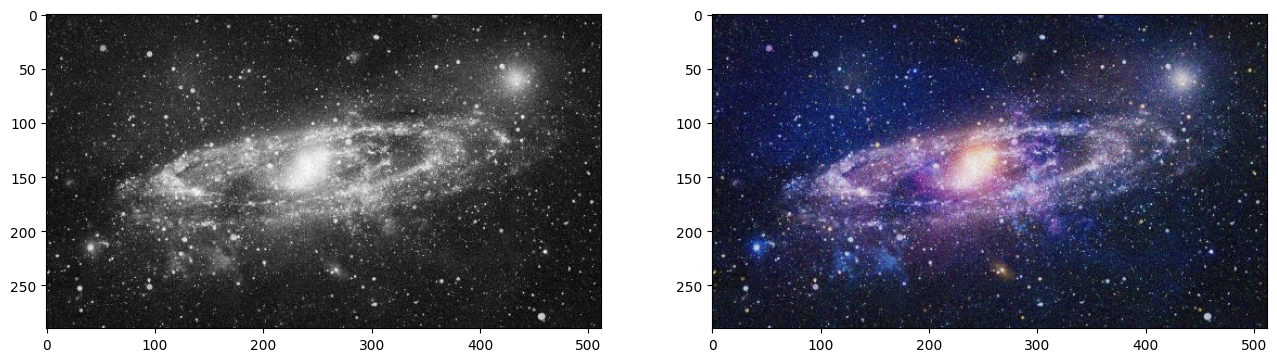

In [ ]:
img_galaxia = cv.imread(f'./galaxias/galaxia0.jpg')
img_temp = np.zeros((img_galaxia.shape[0], img_galaxia.shape[1], img_galaxia.shape[2]), dtype=np.float64)

alpha = 0.5
for i in range(9):
    img_galaxia = cv.imread(f'./galaxias/galaxia{i}.jpg')
    if img_galaxia is None:
        print(f'Erro ao carregar ./galaxias/galaxia{i}.jpg')
    else:
        # print(f'Imagem: ./galaxias/galaxia{i}.jpg')

        alpha = 1 / (i+1)

        img_temp = np.uint8((1-alpha)*img_temp + alpha*img_galaxia)

        # img_temp[:,:,0] = np.uint8((1-alpha)*img_temp[:,:,0] + alpha*img_galaxia[:,:,0])
        # img_temp[:,:,1] = np.uint8((1-alpha)*img_temp[:,:,1] + alpha*img_galaxia[:,:,1])
        # img_temp[:,:,2] = np.uint8((1-alpha)*img_temp[:,:,2] + alpha*img_galaxia[:,:,2])

img_gray = np.zeros((img_galaxia.shape[0],img_galaxia.shape[1]), dtype=np.uint8)
img_gray = np.uint8((np.float16(img_temp[:,:,0]) + np.float16(img_temp[:,:,1]) + np.float16(img_temp[:,:,2])) / 3)

figure(figsize=(cm_to_inch(40), cm_to_inch(20)), dpi=100)
plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.subplot(122)
plt.imshow(cv.cvtColor(img_temp, cv.COLOR_BGR2RGB))

plt.show()

del img_temp, img_galaxia, img_gray

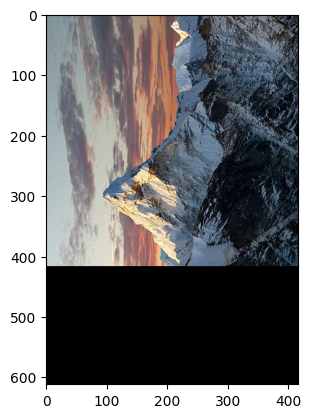

In [ ]:
img = cv.imread("everest.jpg")

img_temp = np.zeros((img.shape[1], img.shape[0],3), dtype=np.uint8)
for i in range(img.shape[0]):
    img_temp[i,:] = img[:,i]

plt.imshow(cv.cvtColor(img_temp, cv.COLOR_BGR2RGB))
plt.show()

del img_temp, img

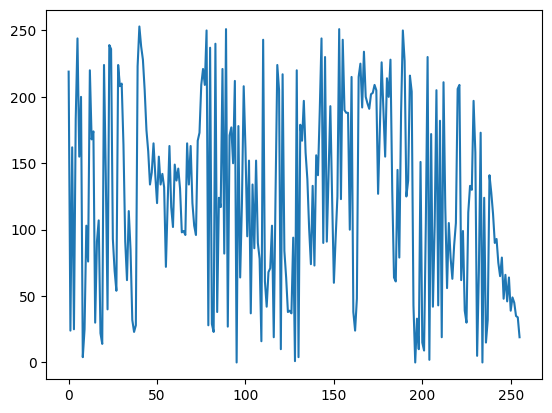

In [ ]:
img = cv.imread("everest.jpg", cv.IMREAD_GRAYSCALE)

vector_hist = np.arange(0,256,1,dtype=np.uint8)
result_hist = np.zeros(256, dtype=np.uint8)

for i in range(256):
    result_hist[i] = np.sum(img==i)

# plt.subplot(121)
# plt.imshow(img, cmap='gray')
# plt.subplot(122)
plt.plot(vector_hist, result_hist)
plt.show()

del img, vector_hist, result_hist